In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data2015 = pd.read_csv('2015.csv')
data2015.drop(['Happiness Rank', 'Standard Error'], axis=1, inplace=True)
data2015['Year'] = 2015
data2015.head()

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [4]:
data2016 = pd.read_csv('2016.csv')
data2016.drop(['Happiness Rank', 'Lower Confidence Interval', 'Upper Confidence Interval'], axis=1, inplace=True)
data2016['Year'] = 2016
data2016.head()

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016


In [5]:
data2017 = pd.read_csv('2017.csv')
data2017.drop(['Happiness.Rank', 'Whisker.high', 'Whisker.low'], axis=1, inplace=True)
data2017.rename(columns={'Happiness.Score': 'Happiness Score', 'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)', 
                         'Health..Life.Expectancy.': 'Health (Life Expectancy)', 'Trust..Government.Corruption.':'Trust (Government Corruption)', 'Dystopia.Residual': 'Dystopia Residual'}, inplace=True)
data2017['Year'] = 2017
data2017.head()

,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Year
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


In [6]:
data2018 = pd.read_csv('2018.csv')
data2018.drop(['Overall rank'], axis=1, inplace=True)
data2018['Year'] = 2018
data2018.head()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018


In [7]:
data2019 = pd.read_csv('2019.csv')
data2019.drop(['Overall rank'], axis=1, inplace=True)
data2019['Year'] = 2019
data2019.head()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


In [8]:
from collections import Counter
def compareSeries(a,b):
  C = a.tolist()
  D = b.tolist()
  return list((Counter(C) - Counter(D)).elements())

In [9]:
data2015.replace({'Country':'Somaliland region'}, 'Somaliland Region',inplace=True)

data2017.replace({'Country':'Taiwan Province of China'}, 'Taiwan',inplace=True)
data2017.replace({'Country':'Hong Kong S.A.R., China'}, 'Hong Kong',inplace=True)

data2018.replace({'Country or region':'Trinidad & Tobago'}, 'Trinidad and Tobago',inplace=True)

data2019.replace({'Country or region':'Trinidad & Tobago'}, 'Trinidad and Tobago',inplace=True)
data2019.replace({'Country or region':'Northern Cyprus'}, 'North Cyprus',inplace=True)


In [10]:
allDatasets = [data2015['Country'], data2016['Country'], data2017['Country'], data2018['Country or region'], data2019['Country or region']]
for idx1,dataset in enumerate(allDatasets):
  for idx2,dataset2 in enumerate(allDatasets):
    print(idx1,idx2,compareSeries(dataset,dataset2))
    print(idx2,idx1,compareSeries(dataset2, dataset))
    print("------------------------------------")
    # if dataset.equals(dataset2) and dataset2.equals(dataset):
    #   print("No Problems")
    # else:
    #   print(idx1, idx2)

0 0 []
0 0 []
------------------------------------
0 1 ['Oman', 'Mozambique', 'Lesotho', 'Swaziland', 'Djibouti', 'Central African Republic']
1 0 ['Puerto Rico', 'Belize', 'Somalia', 'Namibia', 'South Sudan']
------------------------------------
0 2 ['Oman', 'Suriname', 'Somaliland Region', 'Laos', 'Swaziland', 'Djibouti', 'Comoros']
2 0 ['Belize', 'Somalia', 'Namibia', 'South Sudan']
------------------------------------
0 3 ['Oman', 'Suriname', 'North Cyprus', 'Somaliland Region', 'Swaziland', 'Djibouti', 'Comoros']
3 0 ['Belize', 'Northern Cyprus', 'Somalia', 'Namibia', 'South Sudan']
------------------------------------
0 4 ['Oman', 'Suriname', 'Somaliland Region', 'Macedonia', 'Sudan', 'Djibouti', 'Angola']
4 0 ['North Macedonia', 'Somalia', 'Namibia', 'Gambia', 'South Sudan']
------------------------------------
1 0 ['Puerto Rico', 'Belize', 'Somalia', 'Namibia', 'South Sudan']
0 1 ['Oman', 'Mozambique', 'Lesotho', 'Swaziland', 'Djibouti', 'Central African Republic']
-------------

In [11]:
allYearsOld = pd.concat([data2015,data2016, data2017])
allYearsOld.sort_values(['Country','Year'], inplace=True, ignore_index=True)
allYearsOld.head()

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Afghanistan,Southern Asia,3.575,0.319820,0.302850,0.303350,0.23414,0.097190,0.365100,1.952100,2015
1,Afghanistan,Southern Asia,3.360,0.382270,0.110370,0.173440,0.16430,0.071120,0.312680,2.145580,2016
2,Afghanistan,NaN,3.794,0.401477,0.581543,0.180747,0.10618,0.061158,0.311871,2.150801,2017
3,Albania,Central and Eastern Europe,4.959,0.878670,0.804340,0.813250,0.35733,0.064130,0.142720,1.898940,2015
4,Albania,Central and Eastern Europe,4.655,0.955300,0.501630,0.730070,0.31866,0.053010,0.168400,1.928160,2016


In [12]:
allYearsNew = pd.concat([data2018, data2019])
allYearsNew.sort_values(['Country or region', 'Year'], inplace=True, ignore_index=True)
allYearsNew.head()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,Afghanistan,3.632,0.332,0.537,0.255,0.085,0.191,0.036,2018
1,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,2019
2,Albania,4.586,0.916,0.817,0.790,0.419,0.149,0.032,2018
3,Albania,4.719,0.947,0.848,0.874,0.383,0.178,0.027,2019
4,Algeria,5.295,0.979,1.154,0.687,0.077,0.055,0.135,2018


In [43]:
allYearsOldAdjusted = allYearsOld.drop(['Region', 'Family', 'Dystopia Residual'], axis=1)
allYearsNewAdjusted = allYearsNew.rename(columns={'Country or region': 'Country', 'Score': 'Happiness Score', 'GDP per capita':'Economy (GDP per Capita)', 'Healthy life expectancy':'Health (Life Expectancy)', 'Freedom to make life choices':'Freedom', 'Perceptions of corruption':'Trust (Government Corruption)'})
allYearsNewAdjusted.drop(['Social support'], axis=1, inplace=True)

In [225]:
allYearsCombined = pd.concat((allYearsOldAdjusted, allYearsNewAdjusted), axis=0)
allYearsCombined.sort_values(['Country','Year'], inplace=True, ignore_index=True)
allYearsCombined.head(10)

,Country,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Afghanistan,3.575,0.319820,0.303350,0.234140,0.097190,0.365100,2015
1,Afghanistan,3.360,0.382270,0.173440,0.164300,0.071120,0.312680,2016
2,Afghanistan,3.794,0.401477,0.180747,0.106180,0.061158,0.311871,2017
3,Afghanistan,3.632,0.332000,0.255000,0.085000,0.036000,0.191000,2018
4,Afghanistan,3.203,0.350000,0.361000,0.000000,0.025000,0.158000,2019
5,Albania,4.959,0.878670,0.813250,0.357330,0.064130,0.142720,2015
6,Albania,4.655,0.955300,0.730070,0.318660,0.053010,0.168400,2016
7,Albania,4.644,0.996193,0.731160,0.381499,0.039864,0.201313,2017
8,Albania,4.586,0.916000,0.790000,0.419000,0.032000,0.149000,2018
9,Albania,4.719,0.947000,0.874000,0.383000,0.027000,0.178000,2019


In [227]:
allYearsCombined.isna().sum()

Country                          0
Happiness Score                  0
Economy (GDP per Capita)         0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    1
Generosity                       0
Year                             0
dtype: int64

In [228]:
allYearsCombined[allYearsCombined['Trust (Government Corruption)'].isna()]

,Country,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
735,United Arab Emirates,6.774,2.096,0.67,0.284,NaN,0.186,2018


In [229]:
allYearsCombined=allYearsCombined.dropna()

In [230]:
allYearsCombined.isna().sum()

Country                          0
Happiness Score                  0
Economy (GDP per Capita)         0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Year                             0
dtype: int64

# **Data Visualization**

Let's see how correlated the columns are to each other:

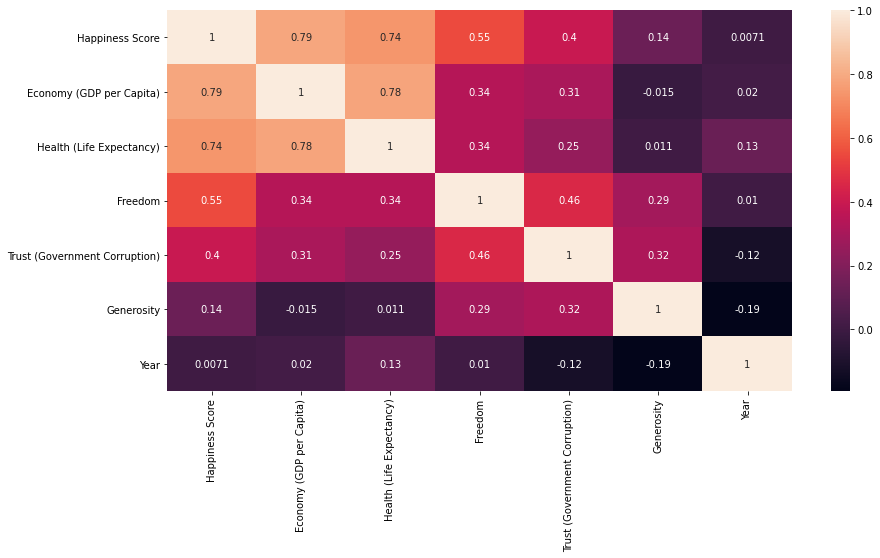

In [48]:
import seaborn as sn
plt.figure(figsize=(14,7))
sn.heatmap(allYearsCombined.corr(), annot=True)

We can get from this that Happiness Score is correlated with (Economy,Health,Freedom),
Economy is related to health. (Correlation≥0.5)

Let's create a function for expecting (learning) a variable based on another variable using linear regression

In [234]:
import math
# previous implementation of the expect funtion
# def expect(dataFrame,columnX,columnY):
#   fig, ax = plt.subplots()
#   ax.plot(dataFrame[columnX], dataFrame[columnY], '.')
#   # To get the linear regression
#   # best fit from https://stackoverflow.com/questions/22239691/code-for-best-fit-straight-line-of-a-scatter-plot-in-python
#   bestFitX = np.unique(dataFrame[columnX])
#   bestFitY = np.poly1d(np.polyfit(dataFrame[columnX], dataFrame[columnY], 1))(np.unique(dataFrame[columnX]))
#   # To get the linear regression line equation
#   slope = (bestFitY[1]-bestFitY[0])/(bestFitX[1]-bestFitX[0])
#   c = (bestFitY[0]-slope*bestFitX[0])
#   ax.plot(bestFitX, bestFitY)
#   plt.xlabel(columnX)
#   plt.ylabel(columnY)
#   # To calculate the error (standard deviation):
#   variance=0
#   numberOfValues=len(dataFrame[columnX])
#   for i in range(numberOfValues):
#     expectedHappiness=dataFrame[columnX][i]*slope+c
#     actualHappiness=dataFrame[columnY][i]
#     variance+=(actualHappiness-expectedHappiness)**2
#   variance=variance/numberOfValues
#   standardDeviation=math.sqrt(variance)
#   print("For a given "+columnX+", "+columnY+" will be in the following interval equation with probability 68.27%")
#   print(str(columnY) +"="+ str(slope) + "*" + columnX,end="")
#   if(c>0):
#     print("+"+str(c),end="")
#   if(c<0):
#     print(c,end="")
#   print(" (±"+str(standardDeviation)+")")

def expect(dataFrame,columnX,columnY):
  yAxis_Data=dataFrame[columnY].to_numpy()
  xAxis_Data=dataFrame[columnX].to_numpy().reshape((-1, 1))
  from sklearn.linear_model import LinearRegression
  model = LinearRegression().fit(xAxis_Data,yAxis_Data)
  c=model.intercept_
  slope=model.coef_

  variance=0
  numberOfValues=len(xAxis_Data)
  for i in range(numberOfValues):
    expectedHappiness=xAxis_Data[i]*slope[0]+c
    actualHappiness=yAxis_Data[i]
    variance+=(actualHappiness-expectedHappiness)**2
  variance=variance/numberOfValues
  standardDeviation=math.sqrt(variance)

  print("For a given "+columnX+", "+columnY+" will be in the following interval equation with probability 68.27%")
  print(str(columnY) +"="+ str(slope) + "*" + columnX,end="")
  if(c>0):
    print("+"+str(c),end="")
  if(c<0):
    print(c,end="")
  print(" (±"+str(standardDeviation)+")")

  fig, ax = plt.subplots()
  ax.plot(dataFrame[columnX],dataFrame[columnY],  '.')
  line=np.arange(min(dataFrame[columnX]),max(dataFrame[columnX]),0.01)
  ax.plot(line, [i*slope+c for i in line])

The relation between Happiness Score and Economy GDP
(Segma=0.69):

For a given Economy (GDP per Capita), Happiness Score will be in the following interval equation with probability 68.27%
Happiness Score=[2.19552047]*Economy (GDP per Capita)+3.369347795736403 (±0.6909795238620047)


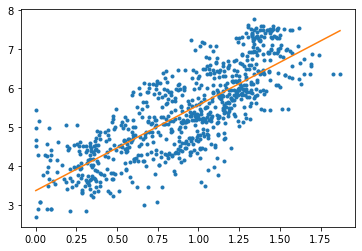

In [235]:
expect(allYearsCombined,'Economy (GDP per Capita)','Happiness Score')

The relation between Health and Happiness (Segma = 0.75):

For a given Health (Life Expectancy), Happiness Score will be in the following interval equation with probability 68.27%
Happiness Score=[3.36971546]*Health (Life Expectancy)+3.3138139695311475 (±0.7540525903834274)


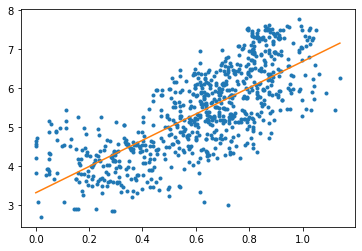

In [236]:
expect(allYearsCombined,'Health (Life Expectancy)','Happiness Score')

The relation between Freedom and Happiness (Segma = 0.9):

For a given Freedom, Happiness Score will be in the following interval equation with probability 68.27%
Happiness Score=[4.07873424]*Freedom+3.699837802100073 (±0.9381803634524931)


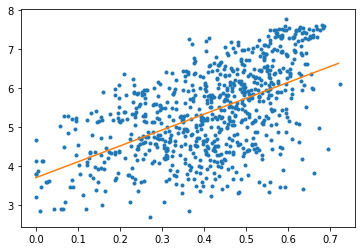

In [237]:
expect(allYearsCombined,'Freedom','Happiness Score')

The relation between Health and Economy (Segma = 0.25):
This is significant relationship

For a given Health (Life Expectancy), Economy (GDP per Capita) will be in the following interval equation with probability 68.27%
Economy (GDP per Capita)=[1.28534938]*Health (Life Expectancy)+0.12746344905454965 (±0.24956517434529393)


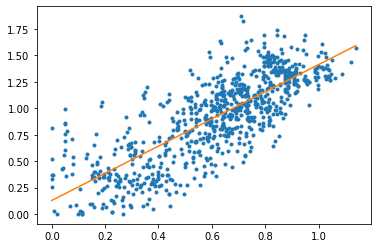

In [238]:
expect(allYearsCombined,'Health (Life Expectancy)','Economy (GDP per Capita)')

Let's see if we can get a relation between (Freedom,Happiness) and corruption

In [242]:
allYearsCombinedCorruption=allYearsCombined.copy()
# making freedom and happiness have the same start-end interval from [0:1]

# min_Freedom=min(allYearsCombinedCorruption['Freedom'])
# max_Freedom=max(allYearsCombinedCorruption['Freedom'])
# range_Freedom = max_Freedom-min_Freedom

# min_Happiness=min(allYearsCombinedCorruption['Happiness Score'])
# max_Happiness=max(allYearsCombinedCorruption['Happiness Score'])
# range_Happiness=max_Happiness-min_Happiness

# allYearsCombinedCorruption['Freedom']=(allYearsCombinedCorruption['Freedom']-min_Freedom)/range_Freedom
# allYearsCombinedCorruption['Happiness Score']=(allYearsCombinedCorruption['Happiness Score']-min_Happiness)/range_Happiness

# This was used for addition, and got a smaller correlation than multiplication (0.54≥0.51). 
# Therefore Multiplication was used to get higher correlation value

# making the relation freedom*happiness
allYearsCombinedCorruption['Freedom*Happiness']=allYearsCombinedCorruption['Freedom']*allYearsCombinedCorruption['Happiness Score']
allYearsCombinedCorruption.head()

,Country,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Freedom*Happiness
0,Afghanistan,3.575,0.319820,0.303350,0.23414,0.097190,0.365100,2015,0.837051
1,Afghanistan,3.360,0.382270,0.173440,0.16430,0.071120,0.312680,2016,0.552048
2,Afghanistan,3.794,0.401477,0.180747,0.10618,0.061158,0.311871,2017,0.402845
3,Afghanistan,3.632,0.332000,0.255000,0.08500,0.036000,0.191000,2018,0.308720
4,Afghanistan,3.203,0.350000,0.361000,0.00000,0.025000,0.158000,2019,0.000000


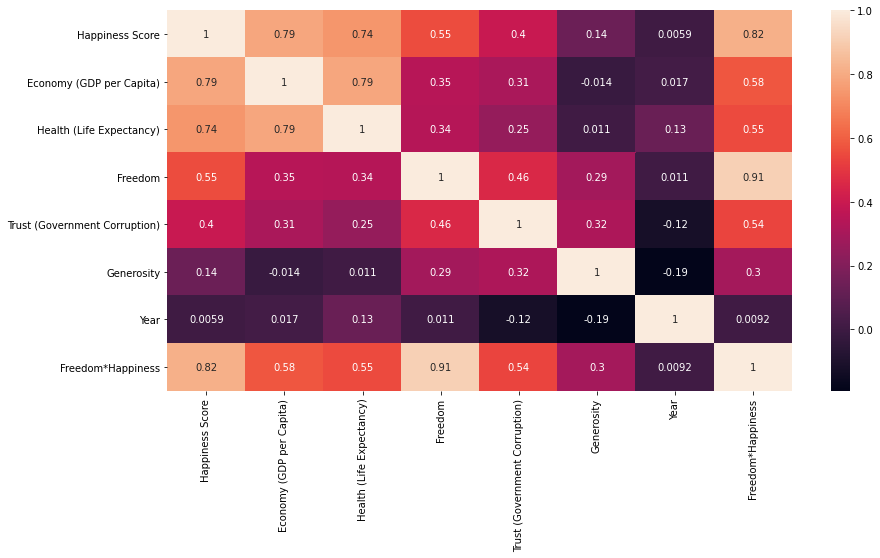

In [243]:
# Checking if Freedom*Happiness is correlated with Corruption
plt.figure(figsize=(14,7))
sn.heatmap(allYearsCombinedCorruption.corr(), annot=True)

They might be correlated (correlation=0.54), so let's try to get a relation between them:

For a given Freedom*Happiness, Trust (Government Corruption) will be in the following interval equation with probability 68.27%
Trust (Government Corruption)=[0.04948559]*Freedom*Happiness+0.011289620146660684 (±0.0892061409922011)


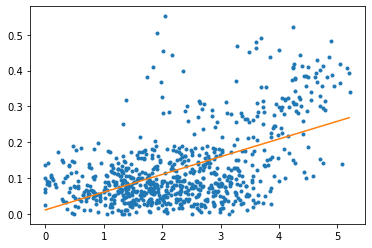

In [241]:
expect(allYearsCombinedCorruption, 'Freedom*Happiness', 'Trust (Government Corruption)')

The Linear Regression algorithm was able to find a high correlation between Freedom*Happiness and Government Corruption (Segma=0.09). Which means that this is a significant relationship